In [16]:
#Read in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [17]:
#Set pandas preferences
pd.set_option('display.max_columns',100)

#Set matplotlib preferences
plt.style.use('ggplot')

In [18]:
#Import raw data
import os
os.chdir('/Users/ksharma/Documents/Data Science/Projects/TelcoCustomerChurn/Data/CleanedData/')

df= pd.read_csv('cleanedData.csv', index_col= 0)

### Data Overview

In [19]:
#Preview data
display(df.shape)
display(df.head())

(7043, 20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#View info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [21]:
#View summary metrics
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [22]:
#View missing data
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

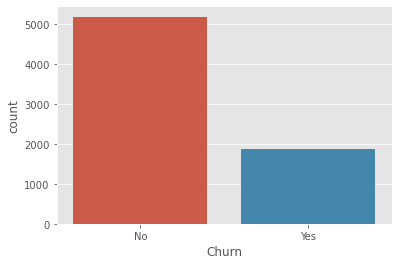

In [23]:
#Target
sns.countplot(x= 'Churn', data=df)

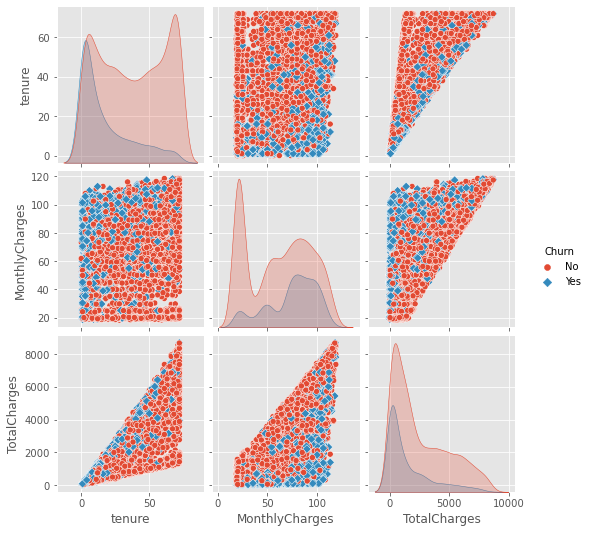

In [24]:
#Pairplot of cols containing numeric data
sns.pairplot(data= df, hue= 'Churn', markers= ['o','D'])

Heatmap

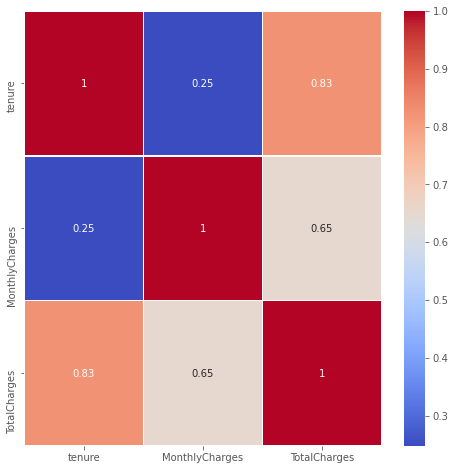

In [25]:
corr= df.corr()

f, ax= plt.subplots(figsize = (8,8))
sns.heatmap(linewidths=.3, cmap="coolwarm",
            annot= True,
            data= corr, ax= ax);

View MonthlyCharges histogram by churn

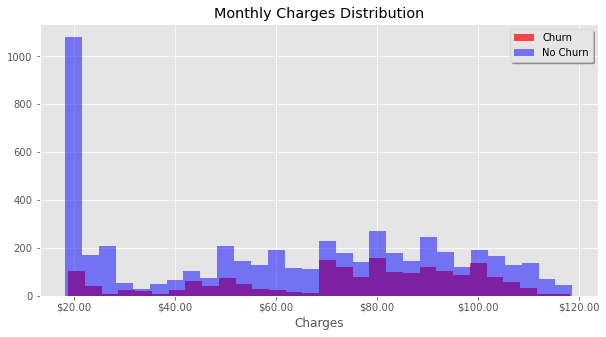

In [26]:
#Plot data
f, ax= plt.subplots(figsize= (10,5))
df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'].hist(bins= 30, alpha= .7, color= 'red',
                                                              label='Churn', ax= ax)
df.loc[df['Churn'] == 'No', 'MonthlyCharges'].hist(bins= 30, alpha= .5, color= 'blue',
                                                             label= 'No Churn', ax= ax)

#Set aesthetics
ax.set_title('Monthly Charges Distribution')
ax.set_xlabel('Charges')

ax.xaxis.set_major_formatter(FormatStrFormatter('$%.2f'))

ax.legend(shadow= True)

View TotalCharges histogram by churn

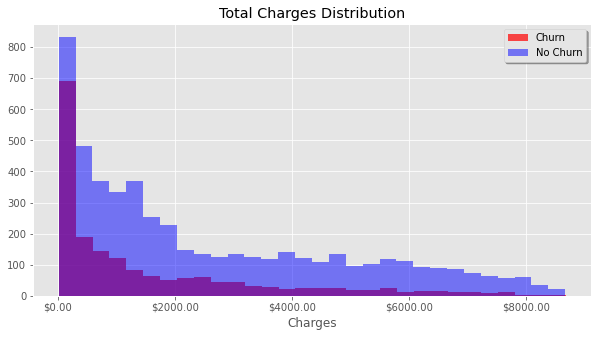

In [27]:
#Plot data
f, ax= plt.subplots(figsize= (10,5))
df.loc[df['Churn'] == 'Yes', 'TotalCharges'].hist(bins= 30, alpha= .7, color= 'red',
                                                              label='Churn', ax= ax)
df.loc[df['Churn'] == 'No', 'TotalCharges'].hist(bins= 30, alpha= .5, color= 'blue',
                                                             label= 'No Churn', ax= ax)

#Set aesthetics
ax.set_title('Total Charges Distribution')
ax.set_xlabel('Charges')

ax.xaxis.set_major_formatter(FormatStrFormatter('$%.2f'))

ax.legend(shadow= True)

Count Plots

In [28]:
#Get a list of all object columns other than Churn
catCols= list(df.select_dtypes(include='object').columns)
catCols.pop()

'Churn'

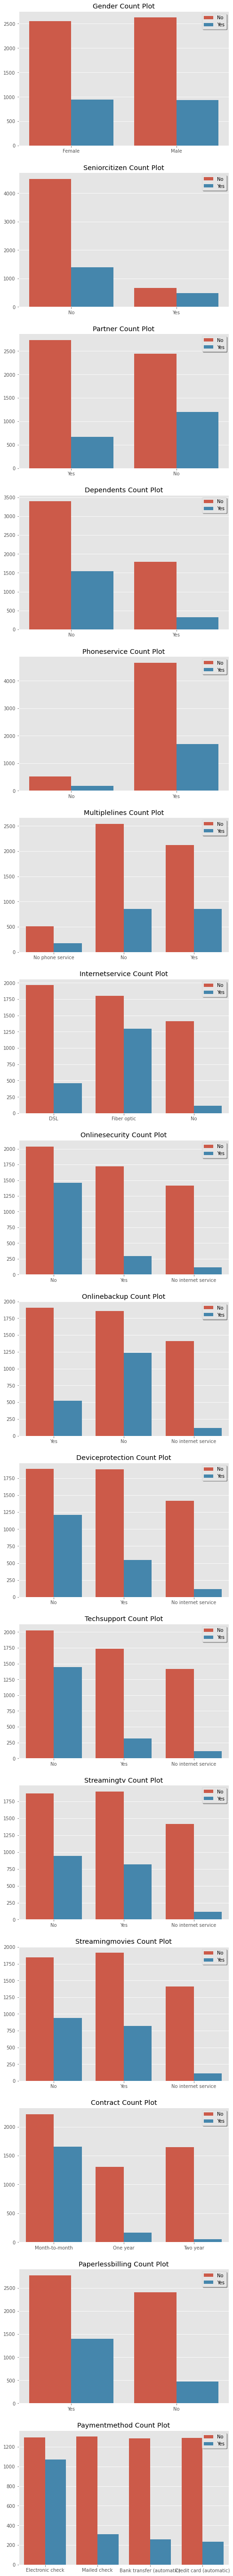

In [29]:
#View all countplots with churn hue
f, axes= plt.subplots(16,1, figsize= (8,100))

for col,ax in zip(catCols,axes.flatten()):
    j= sns.countplot(x= col, hue='Churn', data=df, ax=ax)
    j.set_title('%s Count Plot' % (str.capitalize(col)))
    j.set_xlabel('')
    j.set_ylabel('')
    j.legend(shadow= True)